## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

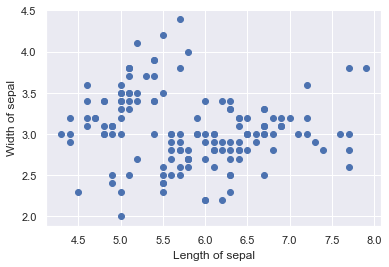

In [3]:
# scatter a plot based on the variables of 'sepal_length' and 'sepal_width'
plt.scatter(data["sepal_length"],data["sepal_width"])
# name the axes
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [4]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create KMeans object with two clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [8]:
# create a copy of data, thus we can compare it with the original one later
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

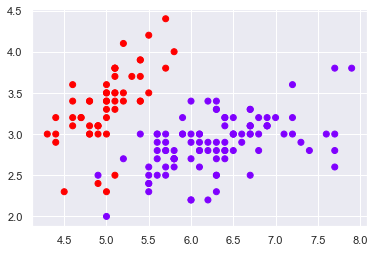

In [9]:
# create a scatter plot based on two variables (sepal_length and width_length)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters ['cluster_pred'], cmap = 'rainbow')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [10]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [11]:
# create a kmeans object with two clusters
kmeans_scaled = KMeans(2)

# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [12]:
# create a copy of data, thus we can compare with the original one later
cluster_scaled = data.copy()
# predict the cluster for each observation
cluster_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

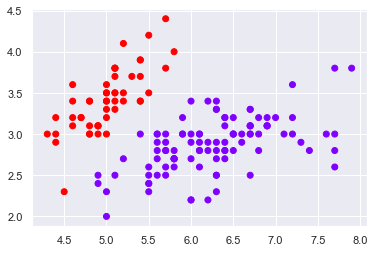

In [13]:
# create a scatter plot based on two variables (sepal_length and width_length)
plt.scatter(cluster_scaled['sepal_length'], cluster_scaled['sepal_width'], c=cluster_scaled ['cluster_pred'], cmap = 'rainbow')

Looks like two solutions are identical. That is because the original features has very similar scales to start with.

## Take Advantage of the Elbow Method

### WCSS

In [16]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# we have it set at 10 right now, but it is completely arbitary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0,
 223.73200573676345,
 140.96581663074699,
 114.57790500611006,
 91.19197002146461,
 81.8689344108607,
 71.71172307670112,
 63.17356030050942,
 55.223028501629216]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

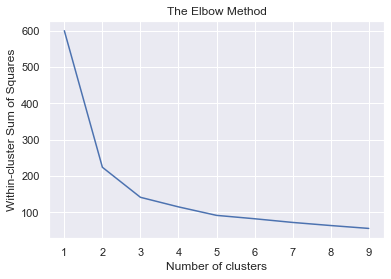

In [17]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

It seems like 2 or 3 cluster solutions are the best. 